In [1]:
from scipy.integrate import quad
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
# plt.rcParams.keys()
plt.rcParams['figure.figsize']=10, 8
# %matplotlib notebook
import mpmath as mp
from mpmath import *
mp.dps = 500
lnMpinGev = mp.mpf('42.334')
Mp = mp.exp(lnMpinGev)
def define_plot_resolution():
    """
    This function allow to define the resolution of a matplotlib plot on a way
    wich is device independent. Put this before saving any of your plot to get
    homogeneous resolution.
    """

    fig = plt.gcf()  # get current figure

    DPI = fig.get_dpi()
#     fig.set_size_inches(1920.0 / float(DPI), 1080.0 / float(DPI))
    fig.set_size_inches(12, 8)
    ax = plt.gca()
    for tickLabel in ax.get_xticklabels()+ax.get_yticklabels():
        tickLabel.set_fontsize(20)
    ax.yaxis.label.set_size(20)
    ax.xaxis.label.set_size(20)
    ax.yaxis.offsetText.set_fontsize(20)
    ax.xaxis.offsetText.set_fontsize(20)
    return

Analytique

In [26]:
# def mphi(phi, phigut, mphigut):
#     return mp.sqrt((mp.mpf('2')*mphigut**mp.mpf('2') - mphigut**mp.mpf('2')/(mp.mpf('1') - mp.log(phi/phigut)/(mp.mpf('48')*mp.pi))**mp.mpf('2') + mp.mpf('1')/mp.mpf('11')*(mphigut**mp.mpf('2') - mphigut**mp.mpf('2')/(mp.mpf('1') - (mp.mpf('11')*mp.log(phi/phigut))/(mp.mpf('80')*mp.pi))**2)))

# def lambda6(phi, phigut, lambda6gut):
#     return (lambda6gut**mp.mpf('2')*(mp.mpf('1') - (mp.mpf('11')*mp.log(phi/phigut))/(mp.mpf('80')*mp.pi))**(mp.mpf('6')/mp.mpf('11'))*(mp.mpf('1') - mp.log(phi/phigut)/(mp.mpf('48')*mp.pi))**mp.mpf('6'))**mp.mpf('0.5')

# def A6(phi, phigut, mphigut, A6gut):
#     return (A6gut + mp.mpf('6')/mp.mpf('11') * (mphigut - mphigut/(mp.mpf('1') - (mp.mpf('11')*mp.log(phi/phigut))/(mp.mpf('80')*mp.pi))) + mp.mpf('6')*(mphigut - mphigut/(mp.mpf('1') - mp.log(phi/phigut)/(mp.mpf('48')*mp.pi))))
    
# def Vrge(phi, mphi_func, A6_func, lambda6_func, phigut, mphigut, A6gut, lambda6gut):
#     lambda6 = lambda6_func(phi, phigut, lambda6gut)
#     mphi = mphi_func(phi, phigut,mphigut)
#     A6 = A6_func(phi, phigut, mphigut, Agut)
#     V = mp.mpf('0.5')*mphi**mp.mpf('2')*phi**mp.mpf('2')-lambda6*A6/(mp.mpf('6')*Mp**mp.mpf('3'))*phi**mp.mpf('6')+lambda6**mp.mpf('2')*phi**mp.mpf('10')/Mp**mp.mpf('6')
#     return V

mphigut = 1e7
lambdagut = 1
g1gut = np.sqrt(np.pi/10)
g2gut = np.sqrt(np.pi/6)
xi = 1
m1gut = xi * mphigut
m2gut = m1gut
Agut = np.sqrt(40)*1e7
phi = 1e14
phi_gut = mp.mpf('3e16')
phi_list = np.linspace(2*float(phi_gut)-phi, phi, 1000)


LLe no Yukawa Allahverdi 2007

[66224614.86158005]
[10444782.12588348]
[1.43334686]


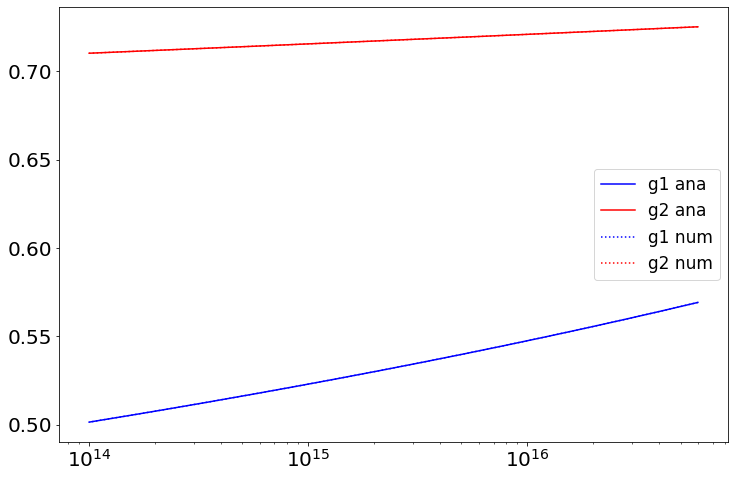

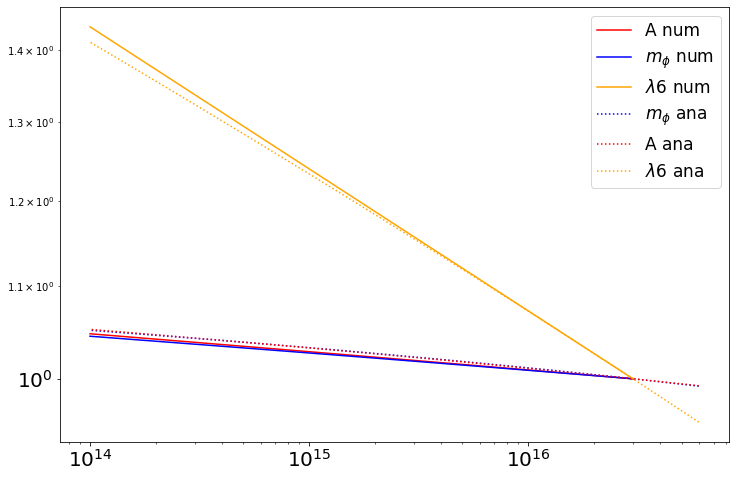

In [25]:
phi_gut = mp.mpf('3e16')
phi = 1e14

phi_list = np.linspace(2*float(phi_gut)-phi, phi, 1000)


#################### TOUT NUMERIQUE #########################


def g1(phi):
    dg1dphi = lambda g1, phi : 11/(16*np.pi**2*phi)*g1**3
    phi_integ = np.linspace(float(phi_gut), phi, 1000)
    return odeint(dg1dphi,  g1gut,phi_integ)[-1]
def g2(phi):
    dg2dphi = lambda g2, phi : 1/(16*np.pi**2*phi)*g2**3
    phi_integ = np.linspace(float(phi_gut), phi, 1000)
    return odeint(dg2dphi,  g2gut,phi_integ)[-1]
def m1(phi, g1phi):
    return m1gut*(g1phi/g1gut)**2
def m2(phi, g2phi):
    return m2gut*(g2phi/g2gut)**2

def mphi(phi, mphigut):
    g1phi, g2phi = g1(phi), g2(phi)
    dmphi2dphi = lambda mphi, phi : -1/(6*np.pi**2*phi)*(3/2*m2(phi, g2phi)**2*g2phi**2+3/2*m1(phi, g1phi)**2*g1phi**2)
    phi_integ = np.linspace(float(phi_gut), phi, 100000)
    mphi_list = odeint(dmphi2dphi, mphigut**2, phi_integ)
    plt.semilogx(phi_integ, np.sqrt(mphi_list)/mphigut, label = r'$m_\phi$ num', color='blue')
    return np.sqrt(mphi_list[-1])

def A(phi, Agut):
    g1phi, g2phi = g1(phi), g2(phi)
    dAdphi = lambda A, phi : -1/(2*np.pi**2*phi)*(3/2*m2(phi, g2phi)*g2phi**2+3/2*m1(phi, g1phi)*g1phi**2)
    phi_integ = np.linspace(float(phi_gut), phi, 100000)
    A_list = odeint(dAdphi, Agut, phi_integ)
    plt.semilogx(phi_integ, A_list/Agut, label='A num', color='red')
    return A_list[-1]

def lambda6(phi, lambdagut):
    g1phi, g2phi = g1(phi), g2(phi)
    dlambdadphi = lambda lambda6, phi : -lambda6/(4*np.pi**2*phi)*(3/2**g2phi**2+3/2*g1phi**2)
    phi_integ = np.linspace(float(phi_gut), phi, 100000)
    lambda_list = odeint(dlambdadphi, lambdagut, phi_integ)
    plt.semilogx(phi_integ, lambda_list/lambdagut, label=r'$\lambda6$ num', color='orange')
    return lambda_list[-1]



plt.figure()
g1_, g2_, g1__, g2__ = [], [], [], []
b1, b2 = mp.mpf('11')/(8*mp.pi**2), mp.mpf('1')/(8*mp.pi**2)

for mu in phi_list:
    g1_.append(g1gut/(mp.sqrt(1-b1*g1gut**2*mp.log(mu/phi_gut))))
    g2_.append(g2gut/(mp.sqrt(1-b2*g2gut**2*mp.log(mu/phi_gut))))
    g1__.append(g1(mu))
    g2__.append(g2(mu))
plt.semilogx(phi_list, g1_, label='g1 ana', color='blue')
plt.semilogx(phi_list, g2_, label='g2 ana', color='red')
plt.semilogx(phi_list, g1__, label='g1 num', color='blue', linestyle=':')
plt.semilogx(phi_list, g2__, label='g2 num', color='red', linestyle=':')
plt.legend(fontsize=17)
define_plot_resolution()

plt.figure()
print(A(phi, Agut))
print(mphi(phi, mphigut))
print(lambda6(phi, lambdagut))
plt.legend()

def Vrge_params(mu, xi, mphi_GUT, A6_GUT, lambda6_GUT):
    mu_GUT = mp.mpf('3e16')
    b1, b2 = mp.mpf('11')/(8*mp.pi**2), mp.mpf('1')/(8*mp.pi**2)
    g1_GUT, g2_GUT = mp.sqrt(mp.pi/10), mp.sqrt(mp.pi/6)
    g1, g2 = g1_GUT/(mp.sqrt(1-b1*g1_GUT**2*mp.log(mu/mu_GUT))), g2_GUT/(mp.sqrt(1-b2*g2_GUT**2*mp.log(mu/mu_GUT)))
    m1, m2 = mphi_GUT*xi*(g1/g1_GUT)**2,  mphi_GUT*xi*(g2/g2_GUT)**2
    mphi_GUT2 = mphi_GUT**2
    mphi2 = mphi_GUT2+(mphi_GUT*xi)**2-m2**2+mp.mpf('1')/mp.mpf('11')*((mphi_GUT*xi)**2-m1**2)
    A6 = A6_GUT+6*(mphi_GUT*xi-m2)+mp.mpf('6')/mp.mpf('11')*(mphi_GUT*xi-m1)
    lambda6 = lambda6_GUT*(g2_GUT/g2)**mp.mpf('6')*(g1_GUT/g1)**(mp.mpf('6')/mp.mpf('11'))
    phi = mu
    return 0.5*mphi2*phi**2-lambda6*A6/(6*Mp**3)*phi**6+lambda6**2*phi**10/Mp**6, mp.sqrt(mphi2), A6, lambda6


#################### TOUT ANALYTIQUE #########################

def mphi(phi, phigut, mphigut):
    return mp.sqrt((mp.mpf('2')*mphigut**mp.mpf('2') - mphigut**mp.mpf('2')/(mp.mpf('1') - mp.log(phi/phigut)/(mp.mpf('48')*mp.pi))**mp.mpf('2') + mp.mpf('1')/mp.mpf('11')*(mphigut**mp.mpf('2') - mphigut**mp.mpf('2')/(mp.mpf('1') - (mp.mpf('11')*mp.log(phi/phigut))/(mp.mpf('80')*mp.pi))**2)))

def lambda6(phi, phigut, lambda6gut):
    return mp.sqrt(lambda6gut**mp.mpf('2')*(mp.mpf('1') - (mp.mpf('11')*mp.log(phi/phigut))/(mp.mpf('80')*mp.pi))**(mp.mpf('6')/mp.mpf('11'))*(mp.mpf('1') - mp.log(phi/phigut)/(mp.mpf('48')*mp.pi))**mp.mpf('6'))

def A6(phi, phigut, mphigut, A6gut):
    return (A6gut + mp.mpf('6')/mp.mpf('11') * (mphigut - mphigut/(mp.mpf('1') - (mp.mpf('11')*mp.log(phi/phigut))/(mp.mpf('80')*mp.pi))) + mp.mpf('6')*(mphigut - mphigut/(mp.mpf('1') - mp.log(phi/phigut)/(mp.mpf('48')*mp.pi))))
    
def Vrge(phi, mphi_func, A6_func, lambda6_func, phigut, mphigut, A6gut, lambda6gut):
    lambda6 = lambda6_func(phi, phigut, lambda6gut)
    mphi = mphi_func(phi, phigut,mphigut)
    A6 = A6_func(phi, phigut, mphigut, Agut)
    V = mp.mpf('0.5')*mphi**mp.mpf('2')*phi**mp.mpf('2')-lambda6*A6/(mp.mpf('6')*Mp**mp.mpf('3'))*phi**mp.mpf('6')+lambda6**mp.mpf('2')*phi**mp.mpf('10')/Mp**mp.mpf('6')
    return V



mphi_list, A_list, lambda_list = [],[],[]
for phi in phi_list:
    mphi_list.append(mphi(phi, phi_gut, mphigut))
    A_list.append(A6(phi, phi_gut, mphigut, Agut))
    lambda_list.append(lambda6(phi, phi_gut, lambdagut))
    

plt.loglog(phi_list, np.array(mphi_list)/mphigut, color='blue', linestyle = ':', label=r'$m_\phi$ ana')
plt.loglog(phi_list, np.array(A_list)/Agut, color='red', linestyle = ':', label='A ana')
plt.loglog(phi_list, (np.array(lambda_list))**2/lambdagut, color='orange', linestyle = ':', label =r'$\lambda6$ ana')

plt.legend(fontsize=17)
define_plot_resolution()

